## Setup

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from src.postproces_classificationresults import *
from src.plotting import *
from src.preproces import Handle_Files

import pickle

file_handler = Handle_Files()
model_name = 'XGB'

In [2]:
dict_dir = f'D:/Programmering/msc/Masterthesis_S23-Results/dicts/{model_name}'

with open('/'.join([dict_dir, f'classification_summaries_{model_name}.pkl']), 'rb') as file:
    classification_summaries = pickle.load(file)

with open('/'.join([dict_dir, f'target_summaries_{model_name}.pkl']), 'rb') as file:
    target_summaries = pickle.load(file)

with open('/'.join([dict_dir, f'roc_information_{model_name}.pkl']), 'rb') as file:
    roc_information = pickle.load(file)

# Performance development

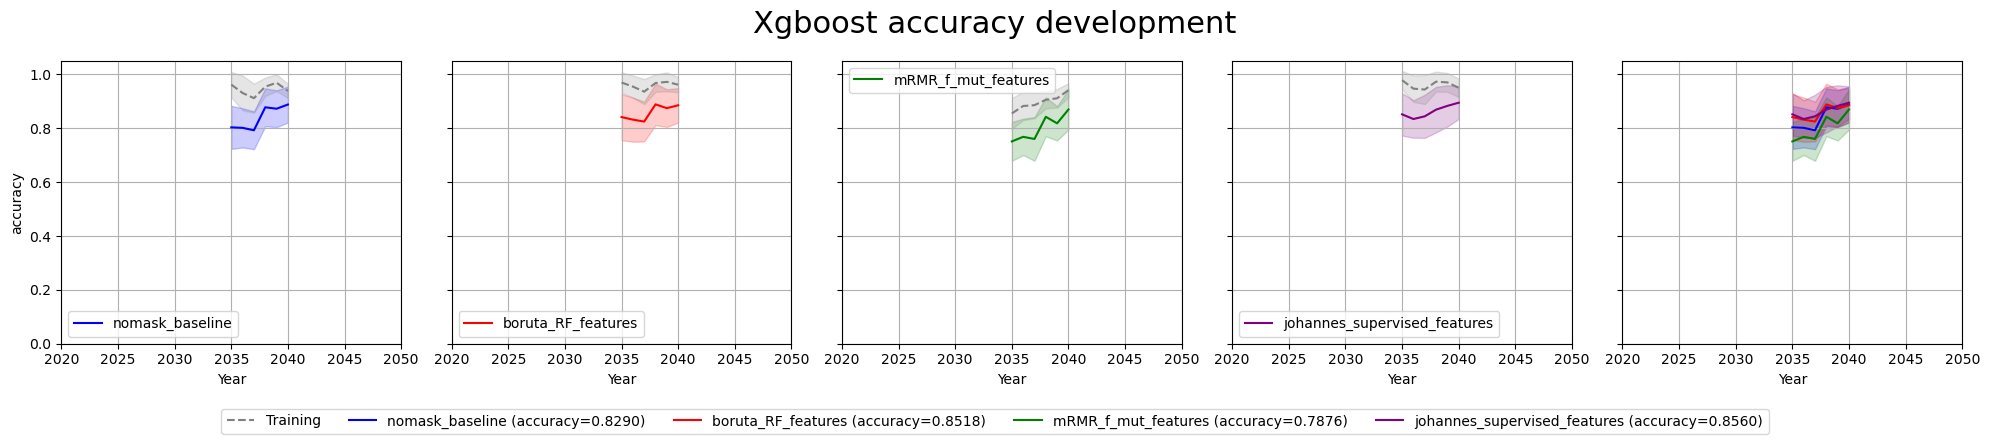

In [3]:
plot_performance(classification_summaries, metric='accuracy', years=list(range(2020, 2051)), 
                 model_name='XGBoost', spread=True, 
                 summary_subplot_for_spread=True, 
                 include_train=True, 
                 report_performance=list(range(2035, 2040)))

# ROC and AUC analysis

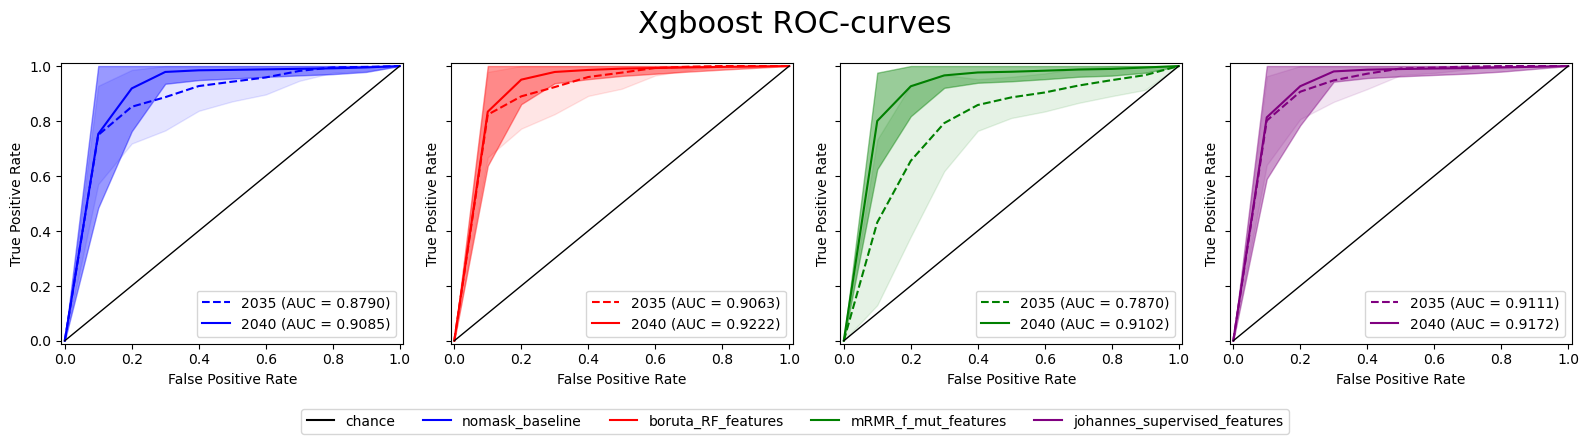

In [4]:
plot_roc_curve(roc_information, years=[2035, 2040], 
               model_name='XGBoost', title=None, 
               spread=True, summary_subplot_for_spread=False)

# Table representation

In [5]:
accuracy_df_long = create_plotdata_from_summary(classification_summaries, 'accuracy', years=list(range(2020, 2051)), include_train=True)
f1_df_long = create_plotdata_from_summary(classification_summaries, 'f1-score', years=list(range(2020, 2051)), include_train=True)

summary_df_acc = accuracy_df_long[accuracy_df_long['Year'].between(2035, 2040)].groupby(['feature_comb_key']).mean().reset_index()
summary_df_acc = summary_df_acc[['feature_comb_key', 'accuracy', 'training_accuracy']]
summary_df_acc.columns = ['feature_comb_key', 'accuracy test', 'accuracy training']

summary_df_f1 = f1_df_long[f1_df_long['Year'].between(2035, 2040)].groupby(['feature_comb_key']).mean().reset_index()
summary_df_f1 = summary_df_f1[['feature_comb_key', 'f1-score', 'training_f1-score']]
summary_df_f1.columns = ['feature_comb_key', 'f1-score test', 'f1-score training']

summary_df = summary_df_acc.merge(summary_df_f1, on='feature_comb_key')
for col in summary_df.columns:
    if col != 'feature_comb_key':
        summary_df[col] = summary_df[col].round(4)

summary_df


,feature_comb_key,accuracy test,accuracy training,f1-score test,f1-score training
0,boruta_RF_features,0.8573,0.9599,0.8505,0.9608
1,johannes_supervised_features,0.8624,0.9600,0.8544,0.9607
2,mRMR_f_mut_features,0.8012,0.8965,0.7926,0.8979
3,nomask_baseline,0.8388,0.9439,0.8317,0.9450


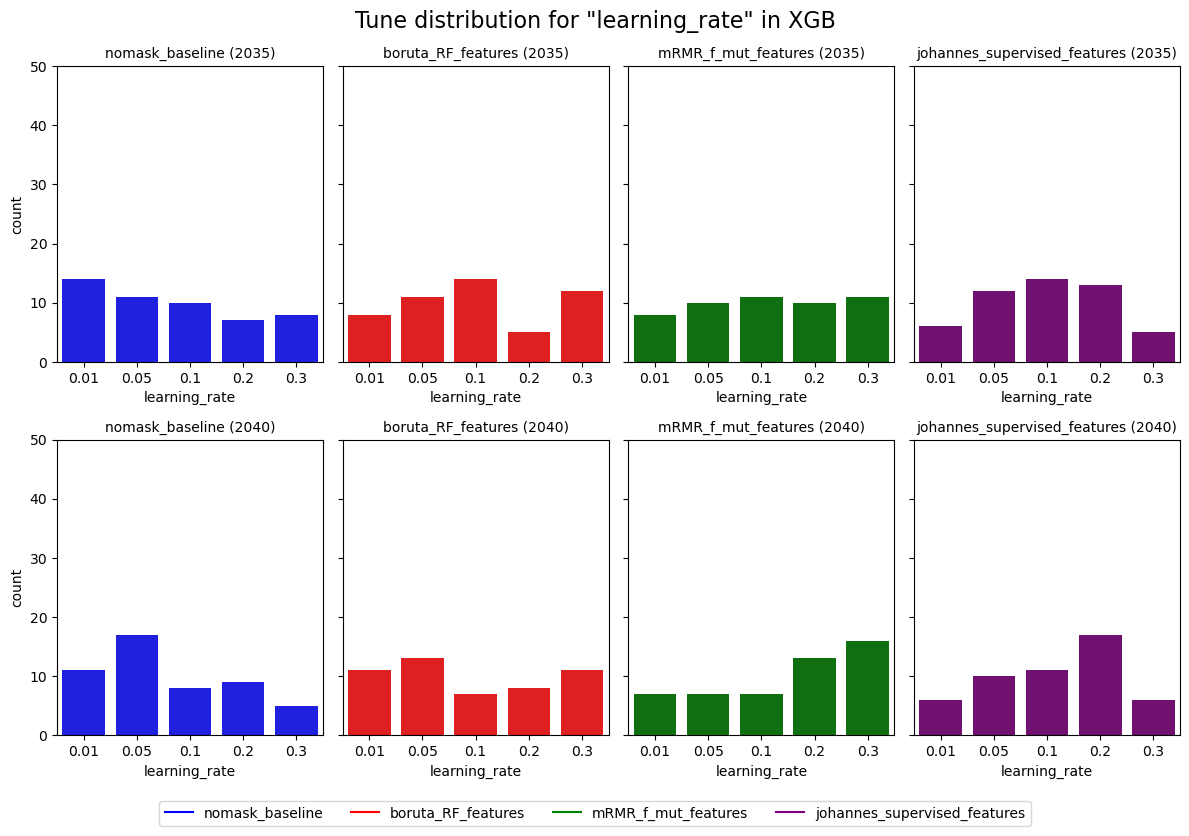

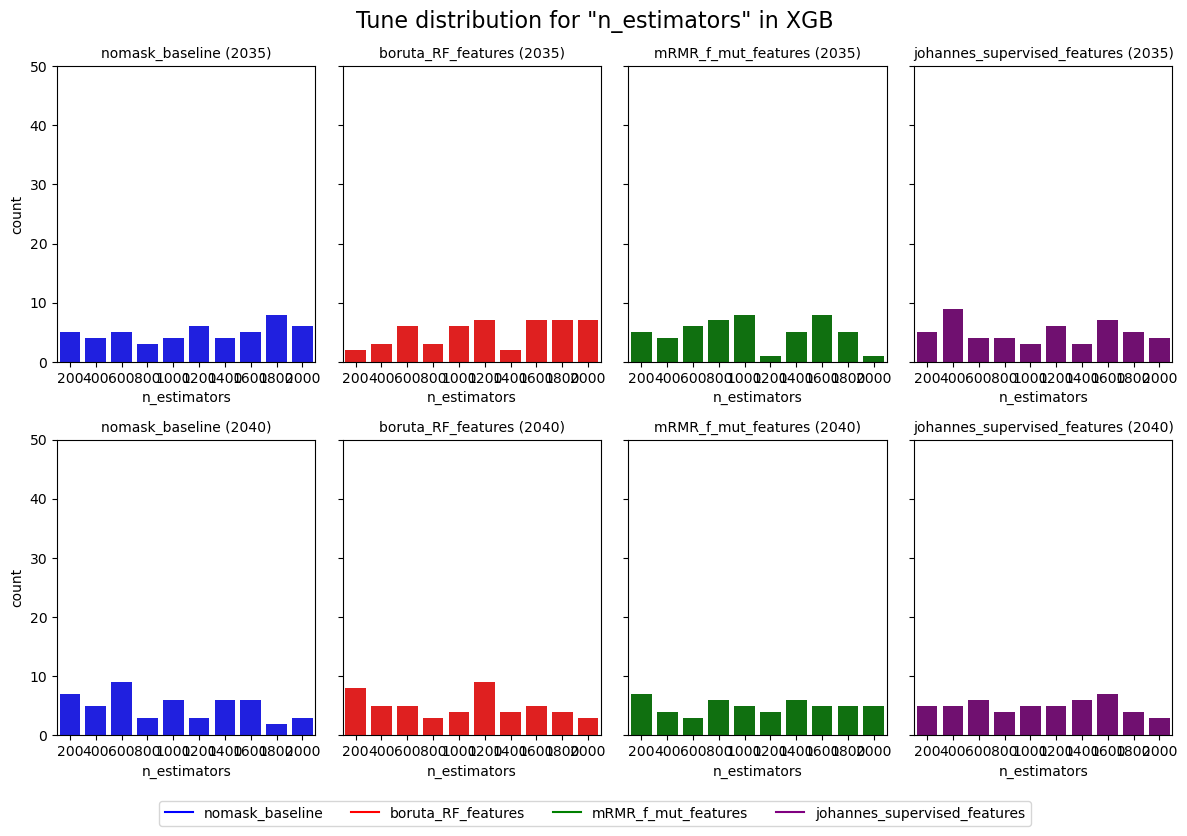

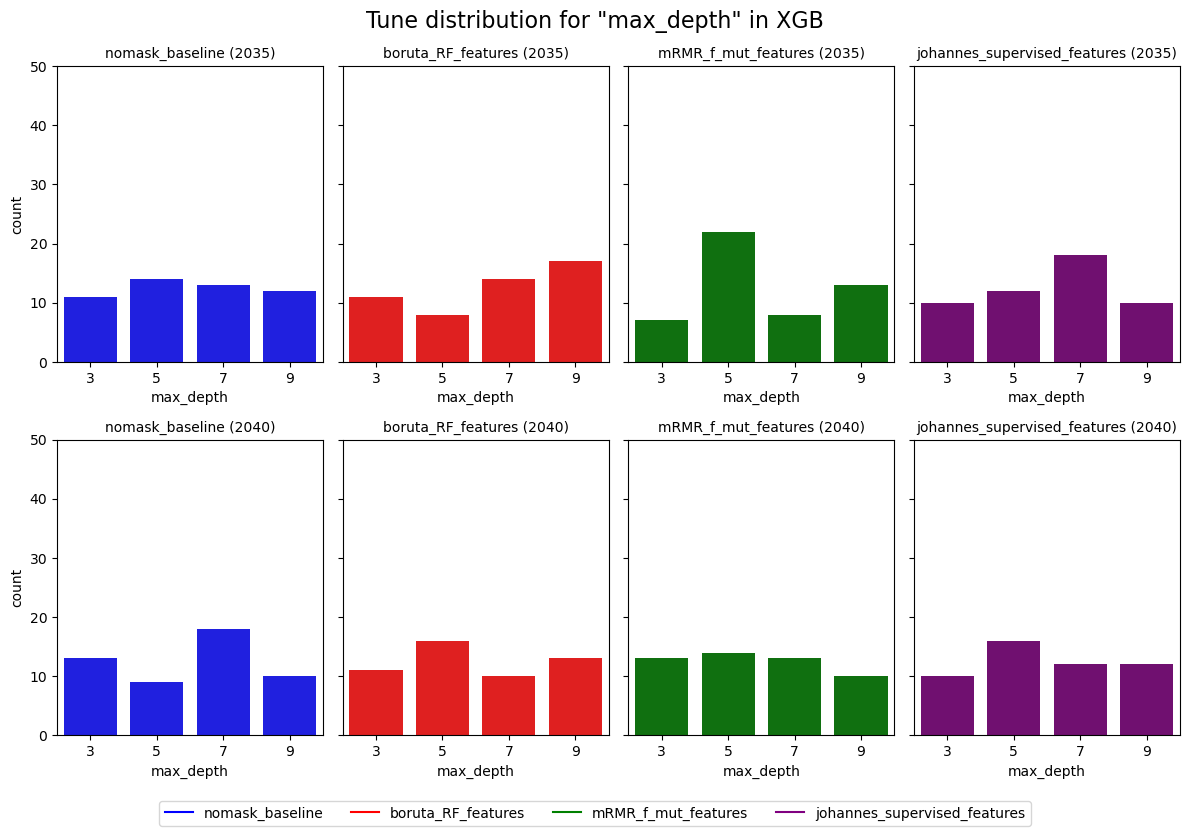

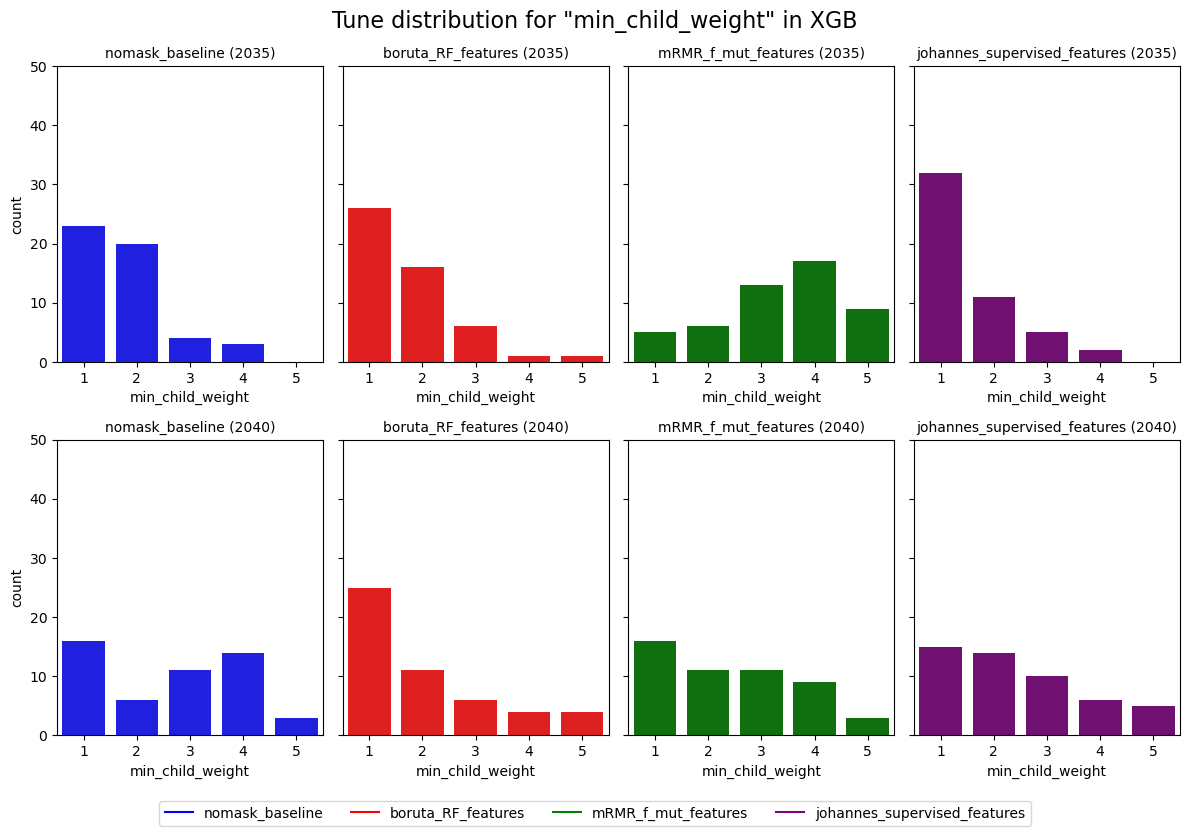

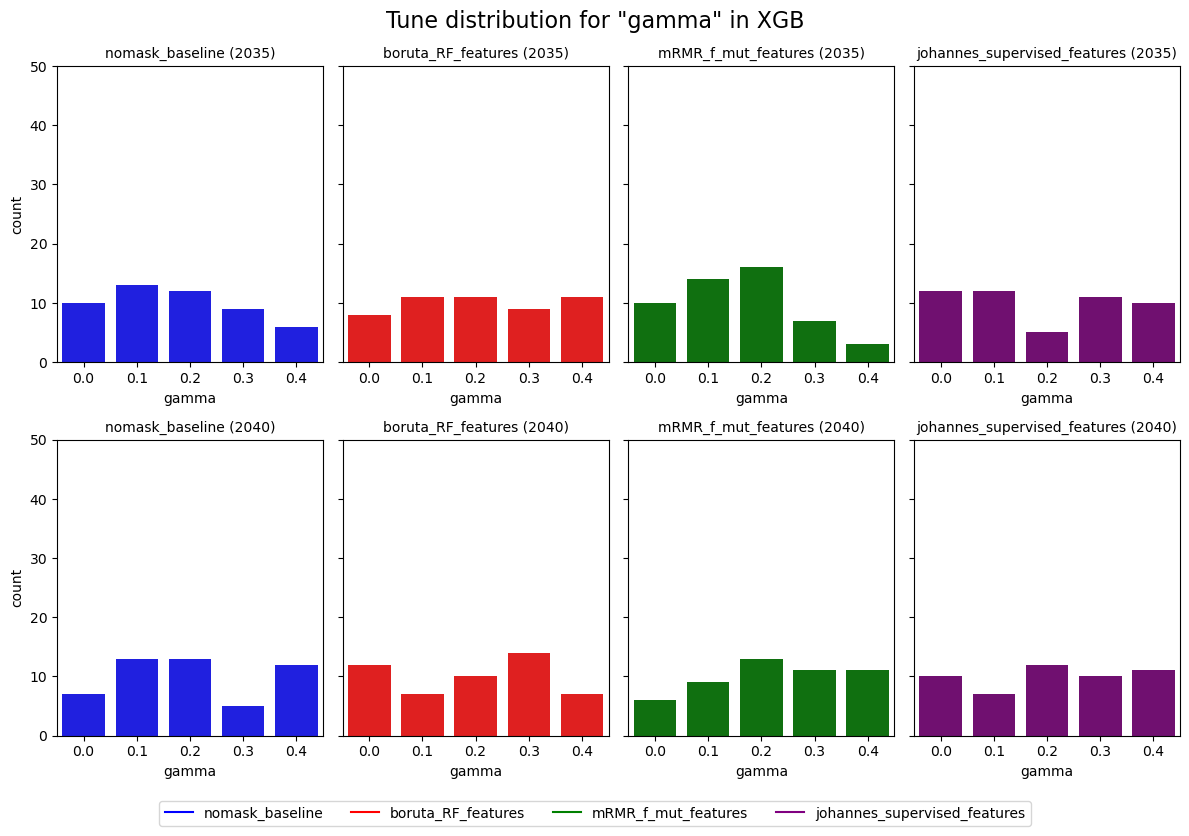

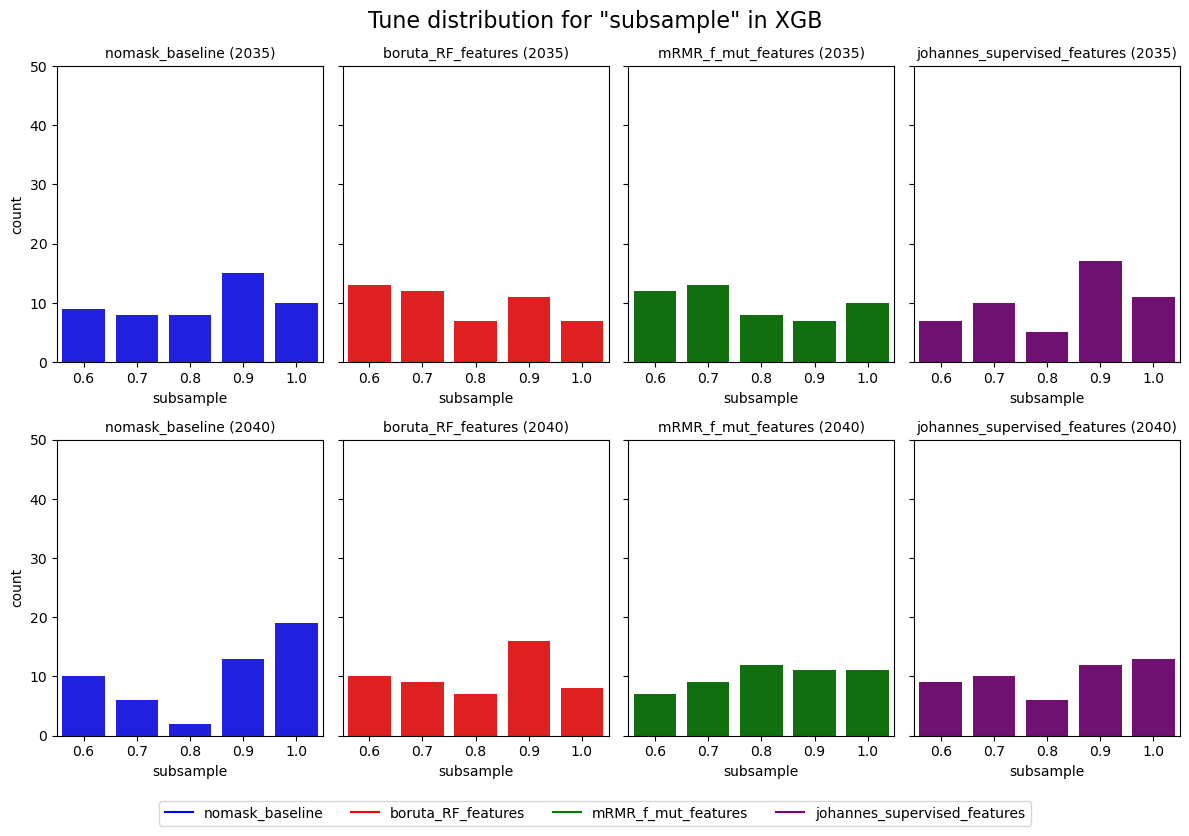

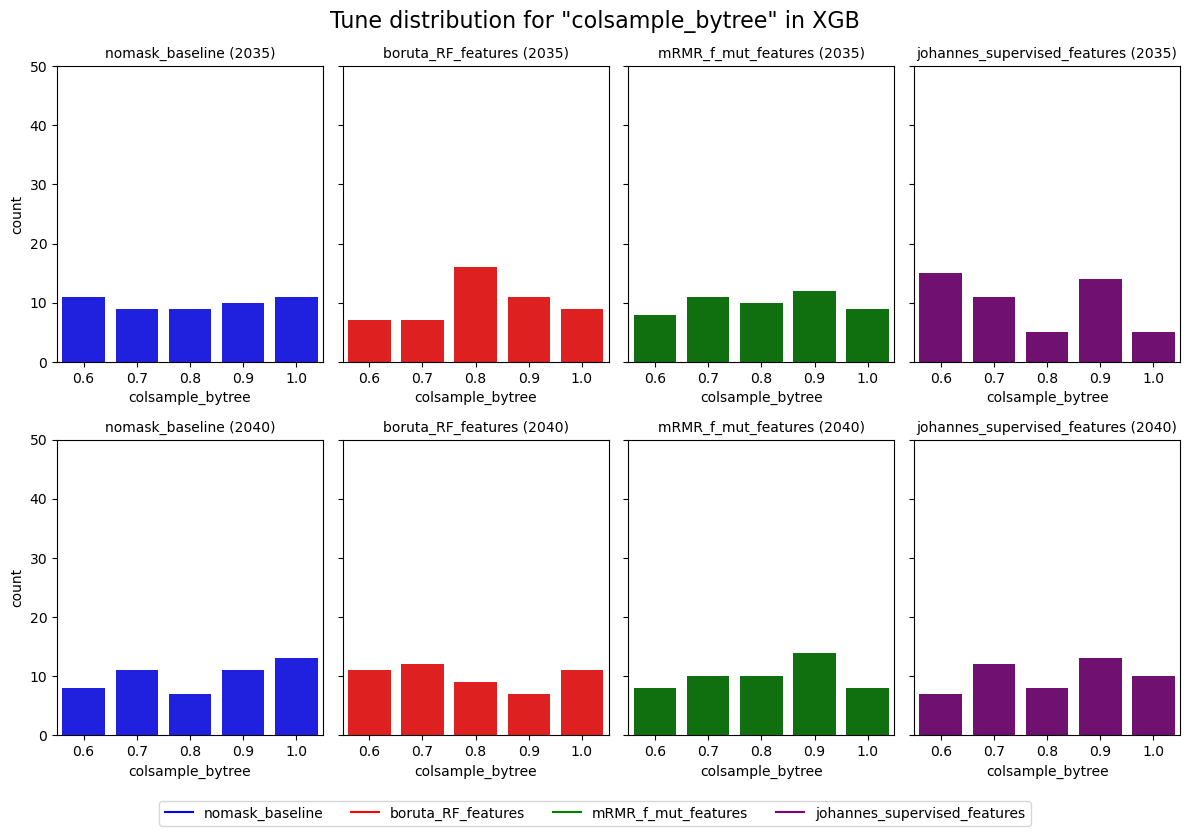

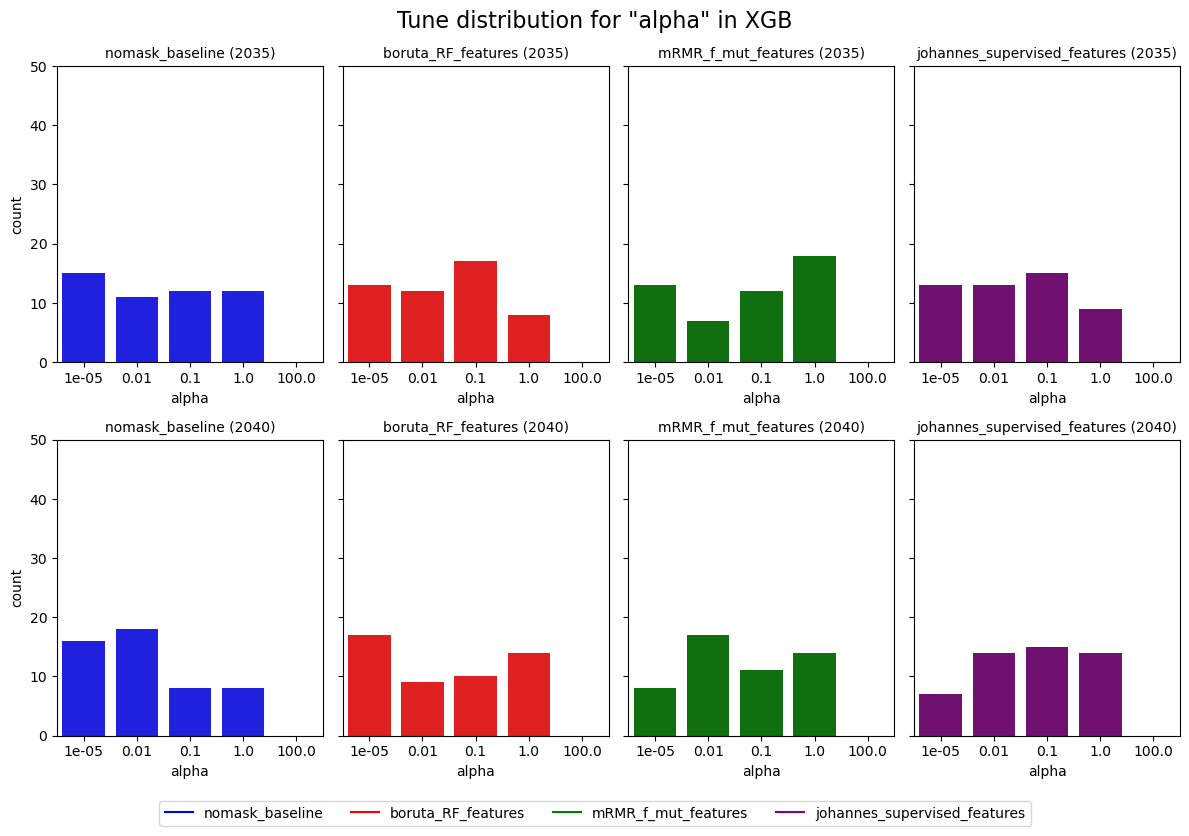

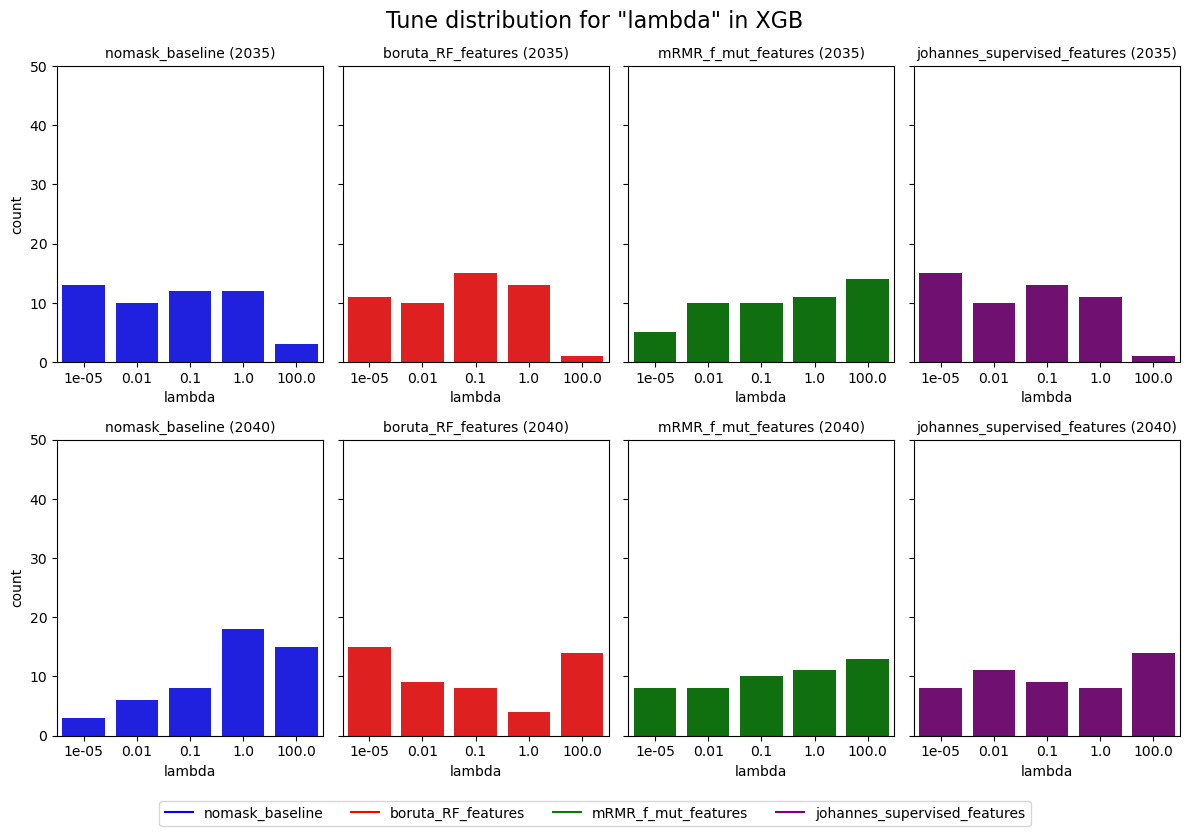

In [6]:
param_grid = {
        'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
        'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
        'max_depth':range(3,10,2),
        'min_child_weight': [1, 2, 3, 4, 5],
        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
        'alpha': [1e-5, 1e-2, 0.1, 1, 100],
        'lambda': [1e-5, 1e-2, 0.1, 1, 100],
    }

plot_hyperparameters(target_summaries, model_name, years=[2035, 2040], param_grid=param_grid)